In [1]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *
import scipy.io
import os.path
from utils import *
from run_simulations import *
from decoding import *
from agents import *
from sklearn import svm
import pickle



%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Repeated simulations of Q-learning and inference-based behavior 

### Q-learning

In [72]:
# Get metrics for all points in the Qspace
N = 11
gammalst = np.linspace(0.01, 1.4, N)
epslst = np.linspace(0.01, 0.5, N)

Qeff_arr = np.zeros((N, N, 50)) * np.nan
Qlapse_arr = np.zeros((N, N, 50)) * np.nan
Qoffset_arr = np.zeros((N, N, 50)) * np.nan
Qslope_arr = np.zeros((N, N, 50)) * np.nan


for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        print(gamma, eps)
        metrics = get_Qmetrics(gamma, eps)
        Qeff_arr[idgamma, ideps, :] = metrics[0]
        Qlapse_arr[idgamma, ideps, :] = metrics[1]
        Qoffset_arr[idgamma, ideps, :] = metrics[2]
        Qslope_arr[idgamma, ideps, :] = metrics[3]
        

0.01 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


KeyboardInterrupt: 

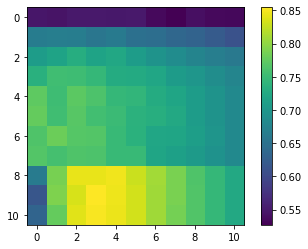

In [50]:
plt.imshow(np.nanmean(Qeff_arr, axis=2))
plt.colorbar()

### Inference-based

In [51]:
# Get metrics for all points in the IB space
prewlst = np.linspace(0.55, 0.99, N)
pswitchlst = np.linspace(0.01, 0.45, N)

IBeff_arr = np.zeros((N, N, 50)) * np.nan
IBlapse_arr = np.zeros((N, N, 50)) * np.nan
IBoffset_arr = np.zeros((N, N, 50)) * np.nan
IBslope_arr = np.zeros((N, N, 50)) * np.nan


for idr, prew in enumerate(prewlst):
    for ids, pswitch in enumerate(pswitchlst):
        print(prew, pswitch)
        metrics = get_IB_metrics(pswitch, prew)
        IBeff_arr[idr, ids, :] = metrics[0]
        IBlapse_arr[idr, ids, :] = metrics[1]
        IBoffset_arr[idr, ids, :] = metrics[2]
        IBslope_arr[idr, ids, :] = metrics[3]
        

0.55 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.054
0.55 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.01
0.5940000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.5940000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.638 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:155: RuntimeWarning: Mean of empty slice
  rightAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:152: RuntimeWarning: Mean of empty slice
  rightAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.726 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.77 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


### Decoding
Here, we will try to use SVM to decode the behavior of Q-learning from inference-based.
We pick pairs of parameter sets, one from Q-learning and one from inference-based, to do the decoding

In [52]:
# SVM decode
decoding_perf = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all0 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all1 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all2 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all3 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))

for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        for idr, pr in enumerate(prewlst):
            for ids, ps in enumerate(pswitchlst):
                Qmetrics = [Qeff_arr[idgamma, ideps], Qlapse_arr[idgamma, ideps], 
                            Qoffset_arr[idgamma, ideps], Qslope_arr[idgamma, ideps]]
                IBmetrics = [IBeff_arr[idr, ids], IBlapse_arr[idr, ids], 
                            IBoffset_arr[idr, ids], IBslope_arr[idr, ids]]
                perf, coefs = fit_and_evaluate_svm(Qmetrics, IBmetrics)
                decoding_perf[idgamma, ideps, idr, ids] = perf
                coefs_all0[idgamma, ideps, idr, ids] = coefs[0][0]
                coefs_all1[idgamma, ideps, idr, ids] = coefs[0][1]
                coefs_all2[idgamma, ideps, idr, ids] = coefs[0][2]
                coefs_all3[idgamma, ideps, idr, ids] = coefs[0][3]



In [57]:
sim_obj = {'Qeff_arr': Qeff_arr, 'Qlapse_arr': Qlapse_arr, 'Qoffset_arr': Qoffset_arr, 
          'Qslope_arr': Qslope_arr, 'IBeff_arr': IBeff_arr, 'IBlapse_arr': IBlapse_arr,
          'IBslope_arr': IBslope_arr, 'IBoffset_arr': IBoffset_arr,
          'coefs0': coefs_all0, 'coefs1': coefs_all1, 'coefs2': coefs_all2,
                                   'coefs3': coefs_all3, 'decoding_perf': decoding_perf,
                                   'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
                                   'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']}
with open('svmclassifier.pickle', 'wb') as f:
    pickle.dump(sim_obj, f)

In [6]:
scipy.io.savemat('svmresults2.mat', {'coefs0': coefs_all0, 'coefs1': coefs_all1, 'coefs2': coefs_all2,
                                   'coefs3': coefs_all3, 'decoding_perf': decoding_perf,
                                   'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
                                   'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']})

## Behavioral session decoding

In [2]:
# Load the behavior
data = scipy.io.loadmat('f01_all_sessions.mat')

# Load the simulation results
with open('svmclassifier.pickle', 'rb') as f:
    sim_obj = pickle.load(f)


expdata = {'alltargets': data['targets_cell'][0][107], 
           'allchoices': data['choices_cell'][0][107]}
pR, pL, _, eff = find_experiment_metrics(expdata, window=20)

eff_arr_all = np.vstack([sim_obj['Qeff_arr'], sim_obj['IBeff_arr']])
lapse_arr_all = np.vstack([sim_obj['Qlapse_arr'], sim_obj['IBlapse_arr']])
offset_arr_all = np.vstack([sim_obj['Qoffset_arr'], sim_obj['IBoffset_arr']])
slope_arr_all = np.vstack([sim_obj['Qslope_arr'], sim_obj['IBslope_arr']])

Qdistance, IBdistance = find_Q_IB_distance([eff, pL], [eff_arr_all,
                    lapse_arr_all, offset_arr_all, slope_arr_all])


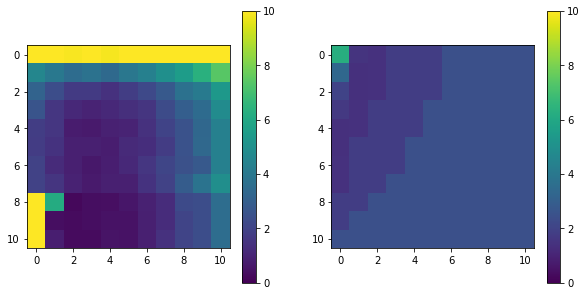

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(Qdistance, vmin=0, vmax=10)
plt.colorbar()

plt.subplot(122)
plt.imshow(IBdistance, vmin=0, vmax=10)
plt.colorbar()

qpos =  [8, 2] . ibpos = [2, 1]


(-5.0, 0.0)

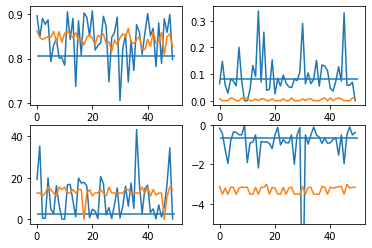

In [6]:
qpos = [np.where(Qdistance == np.min(Qdistance))[0][0],
       np.where(Qdistance == np.min(Qdistance))[1][0]]
ibpos = [np.where(IBdistance == np.min(IBdistance))[0][0],
        np.where(IBdistance == np.min(IBdistance))[1][0]]
print('qpos = ', qpos, '. ibpos =', ibpos)
plt.subplot(221)
plt.plot(sim_obj['Qeff_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['IBeff_arr'][ibpos[0], ibpos[1]])
plt.hlines(eff, 0, 50)

plt.subplot(222)
plt.plot(sim_obj['Qlapse_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['IBlapse_arr'][ibpos[0], ibpos[1]])
plt.hlines(pL[2], 0, 50)


plt.subplot(223)
plt.plot(sim_obj['Qslope_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['IBslope_arr'][ibpos[0], ibpos[1]])
plt.hlines(pL[0], 0, 50)


plt.subplot(224)
plt.plot(sim_obj['Qoffset_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['IBoffset_arr'][ibpos[0], ibpos[1]])
plt.hlines(pL[1], 0, 50)
plt.ylim([-5, 0])


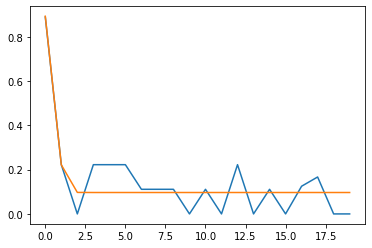

In [13]:
xvals = np.arange(20)
p = pR
ypred = p[2] + (1 - 2 * p[2]) * 1 / (1 + np.exp(-p[0] * (xvals + p[1])))
plt.plot(np.nanmean(arr[1::2, :], axis=0))
plt.plot(xvals, ypred)